In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
auctions = pd.read_csv('auctions.csv.gzip', compression = 'gzip', dtype = {'auction_type_id':'object', 'country': np.float32, 'date': 'object', 'device_id': np.float32, 'platform' :'category', 'ref_type_id':'category', 'source_id':'category'})

In [5]:
auctions['country'].value_counts()

6.333597e+18    19571319
Name: country, dtype: int64

In [3]:
del auctions['country']

In [4]:
auctions.index

RangeIndex(start=0, stop=19571319, step=1)

In [5]:
auctions['auction_type_id'].isnull().sum()

19571319

In [4]:
#auction_type_id tiene todas las filas nulas. Entonces se borra
del auctions['auction_type_id']

In [7]:
#Platform indica el SO y tiene dos valores (Android y iOS)
#La tomo como category
auctions['platform'].value_counts()
auctions['platform'] = auctions['platform'].astype('category')

In [8]:
#Source_id indica de dónde viene la subasta. Tiene 5 valores
#Lo tomo como category
auctions['source_id'].value_counts()
auctions['source_id'] = auctions['source_id'].astype('category')

In [5]:
#Tomo la columna date como datetime
auctions.loc[:,'date'] = pd.to_datetime(auctions['date'], errors = 'coerce')

In [10]:
#ref_type_id tiene 2 valores. Lo tomo como category
auctions['ref_type_id'].value_counts()
auctions['ref_type_id'] = auctions['ref_type_id'].astype('category')

In [11]:
auctions.dtypes

date           datetime64[ns]
device_id             float32
platform             category
ref_type_id          category
source_id            category
dtype: object

## Cantidad de subastas por día

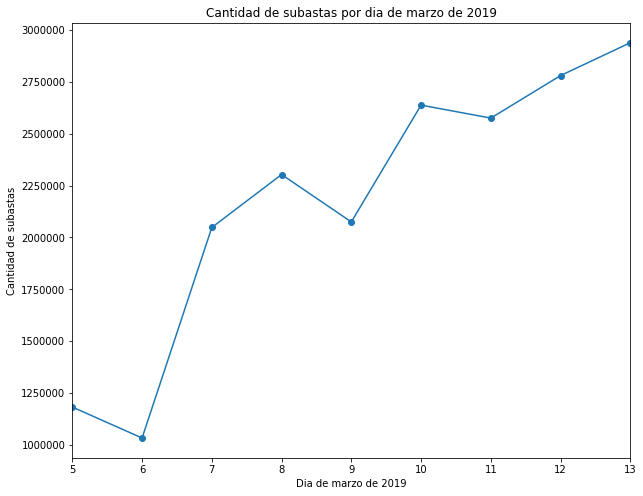

In [7]:
subastas_por_dia = auctions['date'].dt.day.value_counts()
subastas_por_dia.sort_index().plot(marker = 'o', figsize = (10,8))
plt.title('Cantidad de subastas por dia de marzo de 2019')
plt.xlabel('Dia de marzo de 2019')
plt.ylabel('Cantidad de subastas')
plt.show()

In [8]:
subastas_por_dia

13    2938373
12    2779910
10    2637534
11    2574916
8     2303002
9     2074552
7     2047661
5     1182401
6     1032970
Name: date, dtype: int64

## Cantidad de subastas por dia por SO

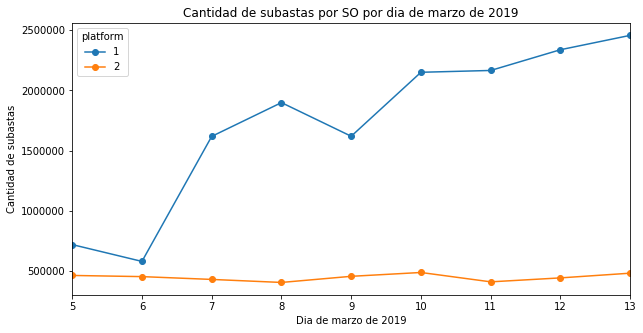

In [9]:
subastas_por_so_por_dia = auctions[['date', 'platform']].groupby([auctions['date'].dt.day]).agg({'platform':'value_counts'})
subastas_por_so_por_dia['platform'].unstack().plot(marker = 'o', figsize = (10, 5))
plt.title('Cantidad de subastas por SO por dia de marzo de 2019')
plt.xlabel('Dia de marzo de 2019')
plt.ylabel('Cantidad de subastas')
plt.show()

In [10]:
subastas_por_so_por_dia

platform
date platform          
5    1           719286
     2           463115
6    1           579624
     2           453346
7    1          1617609
     2           430052
8    1          1898054
     2           404948
9    1          1618742
     2           455810
10   1          2149876
     2           487658
11   1          2165005
     2           409911
12   1          2337162
     2           442748
13   1          2456467
     2           481906

## Cantidad de subastas por hora

In [12]:
subastas_por_hora = auctions['date'].dt.hour.value_counts()
subastas_por_hora

2     1388464
1     1371091
23    1173841
22    1108219
3     1027541
21    1015053
0     1005716
19     994381
18     989528
17     967539
16     941866
20     933318
15     883824
14     805579
12     748935
13     741996
4      716194
11     627907
10     494726
5      487243
9      329604
6      325730
8      247915
7      245109
Name: date, dtype: int64

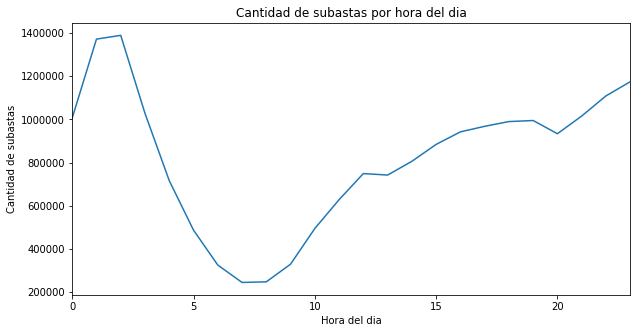

In [16]:
subastas_por_hora = auctions['date'].dt.hour.value_counts()
subastas_por_hora.sort_index().plot(figsize = (10,5))
plt.title('Cantidad de subastas por hora del dia')
plt.xlabel('Hora del dia')
plt.ylabel('Cantidad de subastas')
plt.show()

## Cantidad de subastas por hora por SO

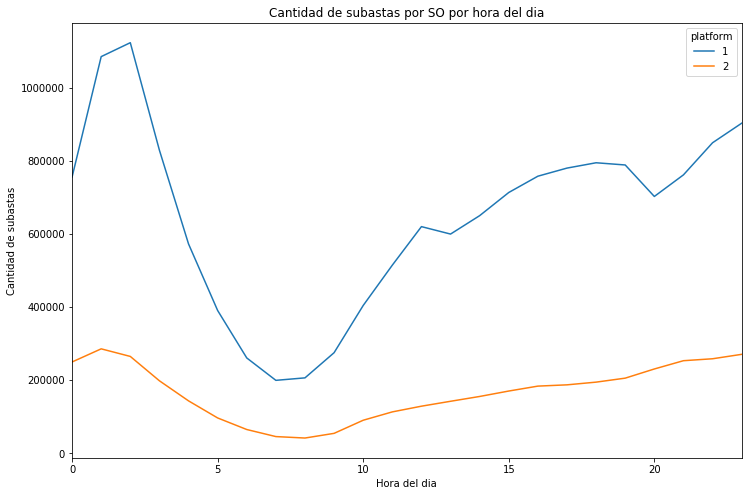

In [11]:
app = auctions[['date', 'platform']].groupby([auctions['date'].dt.hour]).agg({'platform':'value_counts'})
app['platform'].unstack().plot(figsize = (12, 8))
plt.title('Cantidad de subastas por SO por hora del dia')
plt.xlabel('Hora del dia')
plt.ylabel('Cantidad de subastas')
plt.show()

In [12]:
app

platform
date platform          
0    1           755945
     2           249771
1    1          1085385
     2           285706
2    1          1123515
     2           264949
3    1           829257
     2           198284
4    1           572832
     2           143362
5    1           390653
     2            96590
6    1           260795
     2            64935
7    1           199504
     2            45605
8    1           206284
     2            41631
9    1           275170
     2            54434
10   1           404401
     2            90325
11   1           514741
     2           113166
12   1           620165
     2           128770
13   1           599788
     2           142208
14   1           650205
     2           155374
15   1           713579
     2           170245
16   1           758160
     2           183706
17   1           780335
     2           187204
18   1           794921
     2           194607
19   1           788866
     2           205515
20   1           702707
     2           230611
21   1           761798
     2           253255
22   1           849657
     2           258562
23   1           903162
     2           270679

## Cantidad de subastas por SO

In [17]:
subastas_por_dispositivos = auctions['platform'].value_counts()
subastas_por_dispositivos

1    15541825
2     4029494
Name: platform, dtype: int64

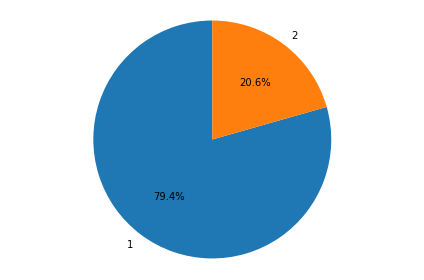

In [23]:
labels = sorted(set(auctions['platform'].values))
sizes = auctions['platform'].value_counts()
explode = (0,0)
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode = explode, labels = labels, autopct = '%1.1f%%', startangle = 90)
ax1.axis('equal')
plt.tight_layout()
plt.show()

Text(0.5,1,'Cantidad de subastas por sistema operativo')

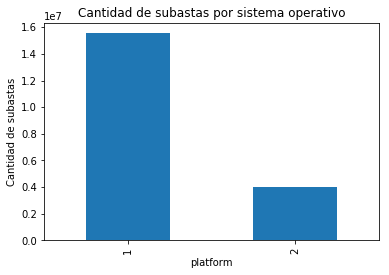

In [22]:
subastas_por_dispositivos.plot(kind = 'bar')
plt.xlabel('platform')
plt.ylabel('Cantidad de subastas')
plt.title('Cantidad de subastas por sistema operativo')

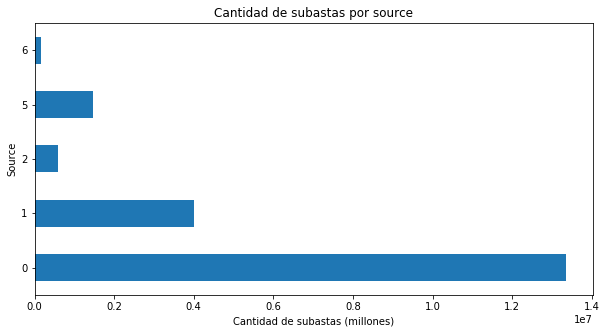

In [13]:
subastas_por_source = auctions['source_id'].value_counts()
subastas_por_source.sort_index().plot(kind = 'barh', figsize = (10,5))
plt.title('Cantidad de subastas por source')
plt.ylabel('Source')
plt.xlabel('Cantidad de subastas (millones)')
plt.show()

In [14]:
subastas_por_source

0    13354597
1     4016739
5     1466494
2      582083
6      151406
Name: source_id, dtype: int64

In [25]:
auctions.count()

date           19571319
device_id      19571319
platform       19571319
ref_type_id    19571319
source_id      19571319
dtype: int64

In [26]:
auctions.index

RangeIndex(start=0, stop=19571319, step=1)

In [27]:
auctions['source_id'].value_counts()

0    13354597
1     4016739
5     1466494
2      582083
6      151406
Name: source_id, dtype: int64

In [28]:
#Busco la cantidad de devices por sistema operativo

In [29]:
auctions.head()

,date,device_id,platform,ref_type_id,source_id
0,2019-03-11 14:18:33.290763,6.059599e+18,1,1,0
1,2019-03-11 14:18:34.440157,1.115995e+18,1,1,0
2,2019-03-11 14:18:35.862360,7.463856e+18,1,1,0
3,2019-03-11 14:18:36.167163,7.829815e+18,1,1,0
4,2019-03-11 14:18:37.728590,1.448534e+18,1,1,0


In [30]:
auctions['device_id'].value_counts().count()

206171

In [31]:
auctions_reduced = auctions[['device_id', 'platform', 'ref_type_id']]

In [32]:
auctions_reduced['device_id'].value_counts().count()

206171

In [33]:
gp = auctions_reduced.groupby(['platform', 'device_id'], as_index = True)

In [63]:
(auctions[auctions['platform'] == '1']['device_id'].value_counts().count()) + (auctions[auctions['platform'] == '2']['device_id'].value_counts().count())

206453

In [64]:
206453-206171

282

In [56]:
plat1 = auctions[auctions['platform'] == '1']['device_id'].value_counts().index
plat1

Float64Index([ 6.331397520815555e+17,  7.202276700711813e+18,
               7.298861650386354e+18,  6.302840455063142e+18,
               5.376802625092059e+18,   8.96371192059501e+18,
                7.95159043906732e+17,  6.841615446324543e+18,
               5.384039060870267e+18,  3.198179158526001e+18,
              ...
               7.288917667224748e+18,   7.04764825732907e+17,
              2.1463088198257213e+18,   7.28962630246885e+18,
               7.050080239610757e+17, 4.4361396412041134e+18,
              2.1461650586803896e+18,  7.289399803073528e+18,
                2.14585829493624e+18, 1.2653945347417047e+18],
             dtype='float64', length=159614)

In [55]:
plat2 = auctions[auctions['platform'] == '2']['device_id'].value_counts().index
plat2

Float64Index([ 8.225266717241115e+18,  6.382842020611752e+18,
              1.5906332353337754e+18,  6.516894478270202e+18,
               8.477398477385499e+18, 1.0467859220555366e+18,
               5.548045513804218e+18, 2.2718686496712294e+18,
               8.767736617327657e+18,  7.313944201140371e+18,
              ...
               9.093903992928338e+17,  8.457626509539017e+18,
               8.456817268980974e+18,  4.899152783753609e+18,
              2.1407450161112678e+18,  7.680945789329211e+18,
               9.100643312011837e+17,  3.984164221007954e+18,
              3.6371578015260344e+18, 1.0310691592507228e+18],
             dtype='float64', length=46839)

In [65]:
#todos estos valores son los que están repetidos
[x for x in plat2 if x in plat1]

[5.292967062497395e+18,
 6.958137840345547e+18,
 4.104993402074956e+18,
 9.059542605292896e+18,
 3.025036588598952e+18,
 8.283415489187676e+18,
 9.082005078092546e+18,
 1.234145314768683e+18,
 7.759840696424464e+18,
 7.163287468635062e+18,
 6.118570002829279e+18,
 3.957117059598385e+18,
 5.351683732199703e+18,
 5.596447115170546e+18,
 5.602469140355875e+18,
 9.172864870721257e+18,
 2.7183987385308283e+18,
 4.717959864565891e+18,
 5.650266010326925e+18,
 7.591098097153868e+18,
 6.384864022495232e+18,
 7.158222018565898e+18,
 7.006794528409518e+18,
 5.607530192378528e+18,
 8.190598565861523e+18,
 5.988352641728512e+18,
 7.097175483724333e+18,
 8.217908785428038e+18,
 2.476693372274737e+18,
 4.764715497025438e+18,
 4.668991464955445e+18,
 3.6198635831327457e+18,
 6.53917003409313e+18,
 5.96435140240579e+18,
 7.598238875420459e+18,
 8.456611110550766e+18,
 7.241639216986194e+18,
 5.187389756975088e+18,
 6.127813597083992e+18,
 7.652071514472186e+18,
 5.859923636290322e+18,
 1.9630290275684

In [67]:
auctions[auctions['device_id'] == 5.292967062497395e+18]['platform'].value_counts()

2    3308
1       1
Name: platform, dtype: int64